In [ ]:
!pip install gdown

In [ ]:
import gdown

url_train = 'https://www.dropbox.com/s/hcblxnxzg1qrjsg/gicDB_5min.csv?dl=1'

training_data = "gicDB.csv"


gdown.download(url_train, training_data, quiet=False)

import pandas as pd

# Load the datasets
df_train = pd.read_csv("gicDB.csv")


In [ ]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import sys

In [ ]:
cwd = os.getcwd()
data_path = os.path.join(cwd,'Data')
if not os.path.exists('Data'):
    os.makedirs('Data')

In [5]:
df_train.head()

,Type,Dataset,Year,Day,Hour,Minute,Field magnitude average nT,BX nT (GSE GSM),BY nT (GSE),BZ nT (GSE),BY nT (GSM),BZ nT (GSM),Speed km/s,Vx Velocity km/s,Vy Velocity km/s,Vz Velocity km/s,Proton Density n/cc,SYM/H nT
0,Validation,V1,1998,118,0,0,4.35,2.51,0.66,2.60,-0.68,2.60,435.9,-435.6,8.4,13.2,5.19,-15
1,Validation,V1,1998,118,0,5,3.92,0.83,-0.39,0.67,-0.66,0.40,448.4,-448.1,3.9,-0.5,5.28,-15
2,Validation,V1,1998,118,0,10,5.60,-3.31,-3.02,-3.20,-1.10,-4.26,466.9,-466.5,-9.3,-16.2,4.51,-15
3,Validation,V1,1998,118,0,15,5.34,-2.94,-3.13,-3.09,-1.26,-4.22,464.6,-464.1,-9.7,-17.0,4.72,-15
4,Validation,V1,1998,118,0,20,5.44,-2.74,-2.84,-3.68,-0.73,-4.59,463.6,-463.0,-10.2,-21.1,4.42,-14


In [6]:

# Get month and day to build proper data field
df_train.loc[:,'Date'] = pd.to_datetime((df_train.Year*1000+df_train.Day).apply(str), format = "%Y%j")
df_train['month'] = df_train['Date'].dt.month
df_train['day'] = df_train['Date'].dt.day

# Date field
df_train["time"] = pd.to_datetime(df_train[['Year','month','day','Hour','Minute']])
df_train["date"] = pd.to_datetime((df_train.Year*1000+df_train.Day).apply(str), format = "%Y%j")
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day

df_train["time"] = pd.to_datetime(df_train[['Year','month','day','Hour','Minute']])
df_train = df_train.sort_values(by='time')

df_train.interpolate(method ='linear', limit_direction ='forward')

df_train["SYM/H nT"] = df_train["SYM/H nT"].astype(np.float64)
df_train["BX nT (GSE GSM)"] = df_train["BX nT (GSE GSM)"].astype(np.float64)
df_train["BY nT (GSM)"] = df_train["BY nT (GSM)"].astype(np.float64)
df_train["BZ nT (GSM)"] = df_train["BZ nT (GSM)"].astype(np.float64)

# Add new variables to dataframe
df_train["B**2"] = df_train["BX nT (GSE GSM)"]**2+df_train["BY nT (GSM)"]**2+df_train["BZ nT (GSM)"]**2
df_train["BY**2"] = df_train["BY nT (GSM)"]**2

In [7]:
df_train.head()

,Type,Dataset,Year,Day,Hour,Minute,Field magnitude average nT,BX nT (GSE GSM),BY nT (GSE),BZ nT (GSE),...,Vz Velocity km/s,Proton Density n/cc,SYM/H nT,Date,month,day,time,date,B**2,BY**2
69408,Train,T1,1998,45,0,0,5.08,1.60,-4.44,-0.58,...,16.6,5.45,-12.0,1998-02-14,2,14,1998-02-14 00:00:00,1998-02-14,22.6154,12.6025
69409,Train,T1,1998,45,0,5,4.97,3.90,-1.72,1.24,...,33.5,6.04,-12.0,1998-02-14,2,14,1998-02-14 00:05:00,1998-02-14,19.7062,4.4521
69410,Train,T1,1998,45,0,10,4.91,4.01,-1.20,2.53,...,45.9,5.78,-13.0,1998-02-14,2,14,1998-02-14 00:10:00,1998-02-14,23.9443,5.3361
69411,Train,T1,1998,45,0,15,4.84,3.90,-1.29,2.48,...,41.7,5.55,-13.0,1998-02-14,2,14,1998-02-14 00:15:00,1998-02-14,23.0597,5.5696
69412,Train,T1,1998,45,0,20,4.83,4.18,-1.24,2.01,...,43.0,5.94,-13.0,1998-02-14,2,14,1998-02-14 00:20:00,1998-02-14,23.0532,4.3264


In [8]:
feature_keys = ['Field magnitude average nT', 'BX nT (GSE GSM)', 'BY nT (GSE)', 'BZ nT (GSE)', 'BY nT (GSM)', 'BZ nT (GSM)', 'Speed km/s', 'Vx Velocity km/s', 'Vy Velocity km/s', 'Vz Velocity km/s', 'Proton Density n/cc', 'SYM/H nT', 'B**2', 'BY**2']
titles = feature_keys

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "time"

In [9]:
# Create a few plots with the values for all data
def show_raw_visualization(df_train):
    time_data = df_train[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = df_train[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()
    plt.savefig('All_Variables.png')
    plt.close(fig)


show_raw_visualization(df_train)


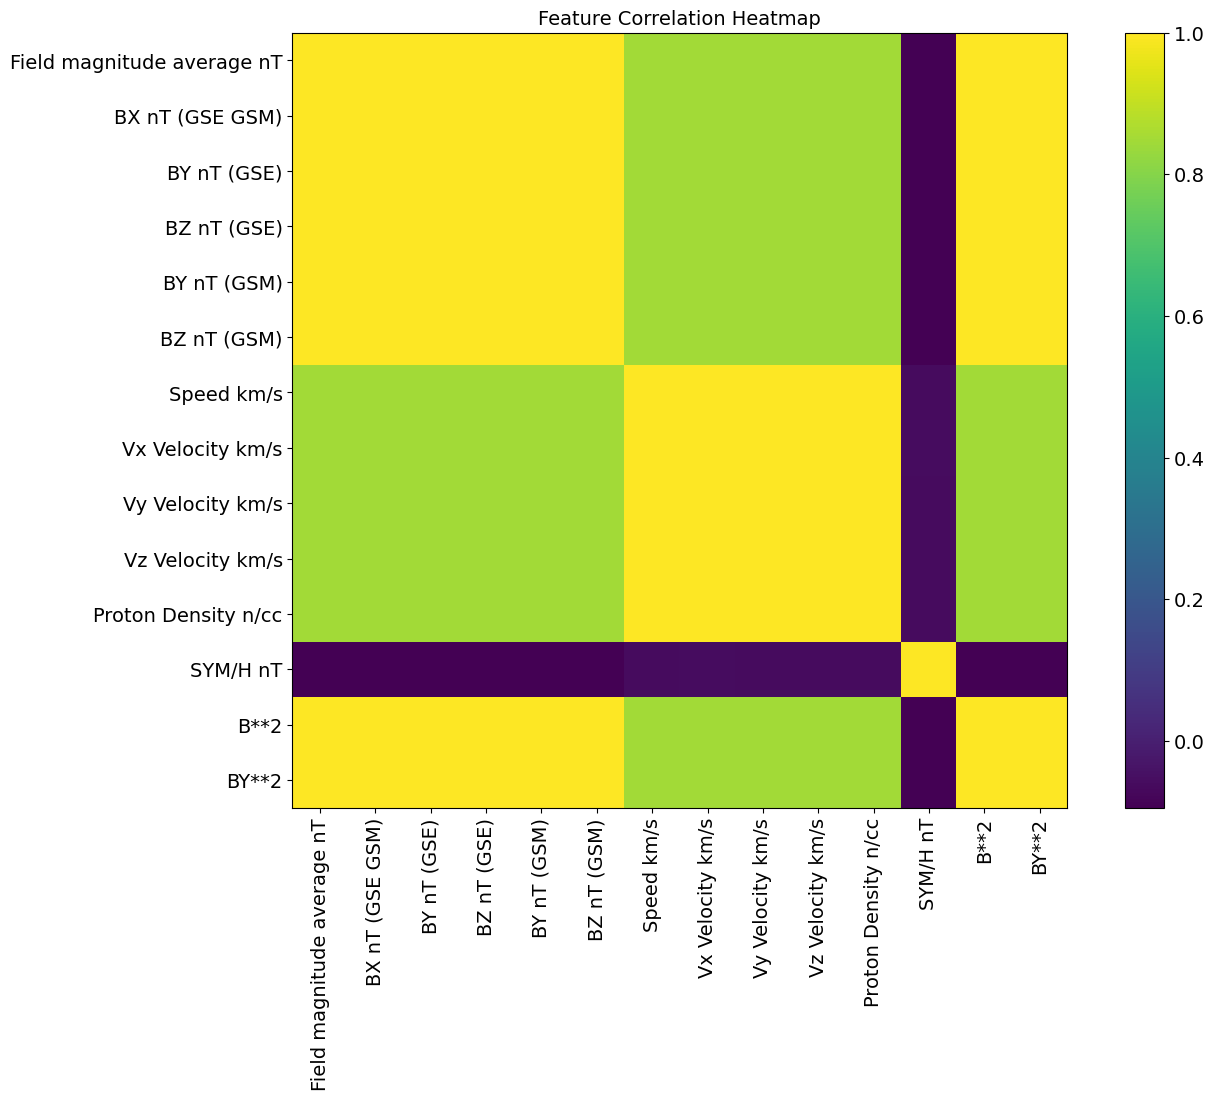

In [10]:

df = df_train
non_floats = []
for col in df:
    if df[col].dtypes != "float64":
        non_floats.append(col)
df = df.drop(columns=non_floats)

# Plot correlations between variables
def show_heatmap(df):
    plt.figure(figsize=(15,10))
    plt.matshow(df.corr(), fignum=1)
    plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(df.shape[1]), df.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.savefig('Heatmap.png')


show_heatmap(df)

In [11]:
# Data Normalization to make training easier
def normalize(df_train):
    data_mean = df_train.mean(axis=0)
    data_std = df_train.std(axis=0)
    return data_mean, data_std, (df_train - data_mean) / data_std


In [12]:
# Check when a new Storm starts
interface = [0]

def checkBreaks(df_train) :

  storms = df_train['Dataset'].unique()
  for st in storms :

    features = df_train.loc[df_train['Dataset'] == st]
    interface.append(interface[-1]+features.shape[0])

  return interface

In [13]:

# Assuming `df` is your original DataFrame
for i, col in enumerate(df_train.columns):
    print(f"Index {i}, Column {col}, Data Type: {df_train[col].dtype}")


Index 0, Column Type, Data Type: object
Index 1, Column Dataset, Data Type: object
Index 2, Column Year, Data Type: int64
Index 3, Column Day, Data Type: int64
Index 4, Column Hour, Data Type: int64
Index 5, Column Minute, Data Type: int64
Index 6, Column Field magnitude average nT, Data Type: float64
Index 7, Column BX nT (GSE GSM), Data Type: float64
Index 8, Column BY nT (GSE), Data Type: float64
Index 9, Column BZ nT (GSE), Data Type: float64
Index 10, Column BY nT (GSM), Data Type: float64
Index 11, Column BZ nT (GSM), Data Type: float64
Index 12, Column Speed km/s, Data Type: float64
Index 13, Column Vx Velocity km/s, Data Type: float64
Index 14, Column Vy Velocity km/s, Data Type: float64
Index 15, Column Vz Velocity km/s, Data Type: float64
Index 16, Column Proton Density n/cc, Data Type: float64
Index 17, Column SYM/H nT, Data Type: float64
Index 18, Column Date, Data Type: datetime64[ns]
Index 19, Column month, Data Type: int32
Index 20, Column day, Data Type: int32
Index 21,

In [14]:
def df_to_x_y(df,window_size=3): # using three days data to predict forth day
    df_as_np = df.to_numpy()
    x = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [ np.concatenate((a[2:18], a[23:25])) for a in df_as_np[i:i + window_size]]
        x.append(row)
        label = df_as_np[i + window_size][15]
        y.append(label)
    return np.array(x),np.array(y)

In [15]:
x,y = df_to_x_y(df_train)
x.shape,y.shape

((130173, 3, 18), (130173,))

In [16]:
x_train, y_train = x[69409:],y[69409:]
x_val, y_val = x[:14688],y[:14688]
x_test, y_test = x[14689:69408],y[14689:69408]
x_train.shape,y_train.shape,x_val.shape, y_val.shape,x_test.shape,y_test.shape

((60764, 3, 18), (60764,), (14688, 3, 18), (14688,), (54719, 3, 18), (54719,))

In [17]:
#normalize the input data features , prepocess data so that there are only float types 

In [18]:
 # Define numerical indices based on the DataFrame structure
numerical_indices = [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] 
    
def calculate_stats_for_3d_array(x, numerical_indices):
    stats = {}
    for i in numerical_indices:
        try:
            # Flatten to get all data for the ith feature and convert to float
            data = x[:, :, i].astype(float).flatten()
            mean = np.mean(data)
            std = np.std(data)
            stats[i] = {
                'mean': mean,
                'std': std
            }
            # Move the print statement inside the try block
            print(f"Index {i}: mean = {mean}, std = {std}")
        except Exception as e:
            print(f"Error processing index {i}: {e}")
    return stats



def preprocess_3d_input(x, stats, numerical_indices):
    x_processed = np.copy(x)
    for i in numerical_indices:
        if i in stats:  # Check if the index is in stats
            x_processed[:, :, i] = (x_processed[:, :, i].astype(float) - stats[i]['mean']) / stats[i]['std']
        else:
            print(f"Warning: Index {i} not found in stats. Skipping this index.")
    return x_processed


# Assuming 'SYM/H nT' is the first column in the DataFrame, hence index 0 for y
def preprocess_output(y):
    y_mean = np.mean(y.astype(float))
    y_std = np.std(y.astype(float))
    return (y.astype(float) - y_mean) / y_std

# Calculate stats using the training data
stats = calculate_stats_for_3d_array(x_train, numerical_indices)


Index 0: mean = 2008.8482654203146, std = 5.334602619614502
Index 1: mean = 200.6685537489303, std = 90.29259927324199
Index 2: mean = 11.5, std = 6.9217855452159815
Index 3: mean = 27.5, std = 17.259690557230442
Index 4: mean = 678.9040674302768, std = 2502.046906852632
Index 5: mean = 672.289162003818, std = 2503.8209938388804
Index 6: mean = 671.9726517345797, std = 2503.9073091606856
Index 7: mean = 671.5722603844382, std = 2504.0144182314243
Index 8: mean = 671.9562874399314, std = 2503.9114307757213
Index 9: mean = 671.5581628376451, std = 2504.01846913756
Index 10: mean = 9682.242234437057, std = 28782.47417305154
Index 11: mean = 8757.89488128936, std = 29077.03786362974
Index 12: mean = 9217.748617602529, std = 28930.254670031278
Index 13: mean = 9217.547219296512, std = 28930.31581023746
Index 14: mean = 96.85091106576263, std = 287.8526283554779


In [19]:
# Now you can preprocess the datasets
x_train_processed = preprocess_3d_input(x_train, stats, numerical_indices)
y_train_processed = preprocess_output(y_train)

# Do similar preprocessing for validation and test sets using the stats from training
x_val_processed = preprocess_3d_input(x_val, stats, numerical_indices)
y_val_processed = preprocess_output(y_val)

x_test_processed = preprocess_3d_input(x_test, stats, numerical_indices)
y_test_processed = preprocess_output(y_test)

In [20]:
print(x_train.dtype)
print(y_train.dtype)


object
float64


In [21]:
print(x_train_processed.dtype)
print(y_train_processed.dtype)

object
float64


In [22]:
if np.any(np.isnan(x_train_processed)) or np.any(np.isnan(y_train_processed)):
    print("NaN values found")
if np.any(np.isinf(x_train_processed)) or np.any(np.isinf(y_train_processed)):
    print("Infinite values found")


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential


2023-12-23 02:32:09.782040: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-23 02:32:09.819022: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
# set hyperparameters
n_neuron       = 64
activation     = 'relu'
num_epochs     = 10
learning_rate  = 0.001
minibatch_size = 64
model_num      = 1

In [25]:
lstm_model = Sequential()
lstm_model.add(LSTM(n_neuron,input_shape=(x_train.shape[1],x_train.shape[2]),
               return_sequences=True,activation=activation))
lstm_model.add(LSTM(n_neuron,return_sequences=False,
               activation=activation))
lstm_model.add(Dense(n_neuron,activation=activation))
lstm_model.add(Dense(y_train.shape[-1],activation='linear')) 

lstm_model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 64)             21248     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 60764)             3949660   
                                                                 
Total params: 4,008,092
Trainable params: 4,008,092
Non-trainable params: 0
_________________________________________________________________


In [26]:
# import numpy as np
# import tensorflow as tf

# def convert_to_tensor(arr):
#     # Convert to float32 if not already
#     arr_float = arr.astype(np.float32)

#     # Check for NaNs and Infs and replace them
#     arr_float = np.nan_to_num(arr_float, nan=0.0, posinf=0.0, neginf=0.0)

#     # Convert to TensorFlow tensor
#     tensor = tf.convert_to_tensor(arr_float, dtype=tf.float32)
#     return tensor

# # Convert x_train_processed and y_train_processed to tensors
# x_train_tensor = convert_to_tensor(x_train_processed)
# y_train_tensor = convert_to_tensor(y_train_processed)


In [27]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# history = lstm_model.fit(x_train_tensor, y_train_tensor, 
#                         batch_size = minibatch_size,
#                         epochs = num_epochs,
#                         validation_split=0.2, verbose=1,
#                         callbacks=[early_stop],
#                         shuffle=False)


In [28]:
import numpy as np
import tensorflow as tf

# Function to convert array to float, handling non-numeric values
def convert_to_float(array):
    # Attempt to convert to float, setting non-convertible values to NaN
    array_float = pd.to_numeric(array.flatten(), errors='coerce')
    if np.any(np.isnan(array_float)):
        print("Warning: NaN values found after conversion. Original non-numeric values will be set to NaN.")
    return array_float.reshape(array.shape)

# Convert arrays to float, handling non-numeric values
x_train_processed_float = convert_to_float(x_train_processed)
y_train_processed_float = convert_to_float(y_train_processed)

# Check for NaNs and Infs
if np.any(np.isnan(x_train_processed_float)) or np.any(np.isnan(y_train_processed_float)):
    raise ValueError("NaN values found in processed data.")
if np.any(np.isinf(x_train_processed_float)) or np.any(np.isinf(y_train_processed_float)):
    raise ValueError("Infinite values found in processed data.")

# Convert to TensorFlow tensors
x_train_tensor = tf.convert_to_tensor(x_train_processed_float, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train_processed_float, dtype=tf.float32)

# Fit the model
history = lstm_model.fit(x_train_tensor, y_train_tensor, 
                         batch_size=minibatch_size,
                         epochs=num_epochs,
                         validation_split=0.2, verbose=1,
                         callbacks=[early_stop],
                         shuffle=False)


Epoch 1/10
760/760 [==============================] - 39s 48ms/step - loss: 452430624.0000 - val_loss: 6971642.0000
Epoch 2/10
760/760 [==============================] - 36s 47ms/step - loss: 17353652.0000 - val_loss: 1.2858
Epoch 3/10
760/760 [==============================] - 35s 46ms/step - loss: 0.9252 - val_loss: 1.2857
Epoch 4/10
760/760 [==============================] - 36s 47ms/step - loss: 0.9253 - val_loss: 1.2856
Epoch 5/10
760/760 [==============================] - 36s 47ms/step - loss: 0.9262 - val_loss: 1.2903
Epoch 6/10
760/760 [==============================] - 36s 47ms/step - loss: 0.9276 - val_loss: 1.2903
Epoch 7/10
760/760 [==============================] - 35s 46ms/step - loss: 0.9276 - val_loss: 1.2903
Epoch 8/10
760/760 [==============================] - 36s 47ms/step - loss: 0.9276 - val_loss: 1.2903
Epoch 9/10
760/760 [==============================] - 36s 48ms/step - loss: 0.9276 - val_loss: 1.2903
Epoch 10/10
760/760 [==============================] - 36s 47

In [30]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean squared error')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
    plt.legend()
    

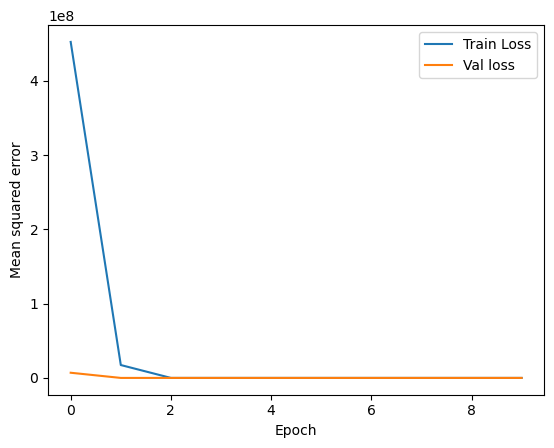

In [31]:
plot_history(history)

In [32]:
def make_dir(path):
    if os.path.exists(path) is False:
        os.makedirs(path)

In [33]:
model_path = os.path.join(cwd,'saved_model')
make_dir(model_path)

In [34]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
lstm_model.save(os.path.join(model_path,'LSTM_model.h5'))

In [35]:
# reload the saved model
lstm_model = load_model(os.path.join(model_path,'LSTM_model.h5'))

In [36]:
# y_test_pre = lstm_model.predict(X_test)
# y_test_pre = y_test_pre.reshape(y_test_pre.shape[0], 96, 144)

# y_test_pre = xr.Dataset(coords={'time': X_test_xr.time.values[slider-1:], 
#                                'latitude': X_test_xr.latitude.values, 
#                                'longitude': X_test_xr.longitude.values},
#                        data_vars=dict(tas=(['time', 'latitude', 'longitude'], y_test_pre)))

In [37]:
symh_train_mean = np.mean(y_train.astype(float))
symh_train_std = np.std(y_train.astype(float))

In [38]:
def postprocess_symh(arr):
    arr = (arr * symh_train_std) + symh_train_mean
    return arr


In [39]:
def plot_predictions_symh(model, x, y, start=600, end=800):
    prediction = model.predict(x)
    symh_prediction = postprocess_symh(prediction[:, 0])

    # Check if y is 1D or 2D and handle accordingly
    if y.ndim > 1:
        symh_actual = postprocess_symh(y[:, 0])  # For 2D y
    else:
        symh_actual = postprocess_symh(y)  # For 1D y

    df = pd.DataFrame(data={
        'SYM/H Prediction': symh_prediction,
        'SYM/H Actual': symh_actual,
    })
    plt.plot(df['SYM/H Prediction'][start:end], color='green', linewidth=2)
    plt.plot(df['SYM/H Actual'][start:end], color='red')
    plt.legend(['SYM/H Prediction', 'SYM/H Actual'], loc='upper left')
    return df[start:end]



In [40]:
x_test_float = x_test.astype(np.float32)

32/32 [==============================] - 0s 4ms/step


Text(0.5, 1.0, 'Test Data Comparison for SYM/H nT (Subset)')

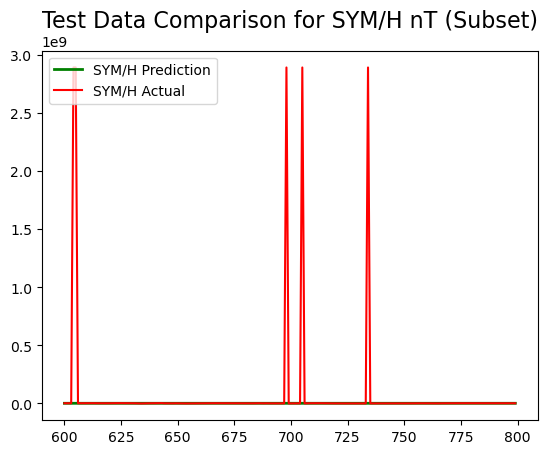

In [41]:
# Define the size of the subset you want to use
subset_size = 1000

# Select a subset of the test data
x_test_subset = x_test_float[:subset_size]
y_test_subset = y_test[:subset_size]

# Generate predictions and plot for the subset
post_processed_df = plot_predictions_symh(lstm_model, x_test_subset, y_test_subset)
plt.title('Test Data Comparison for SYM/H nT (Subset)', fontsize=16)


32/32 [==============================] - 0s 4ms/step


Text(0.5, 1.0, 'Train Data Comparison for SYM/H nT (Subset)')

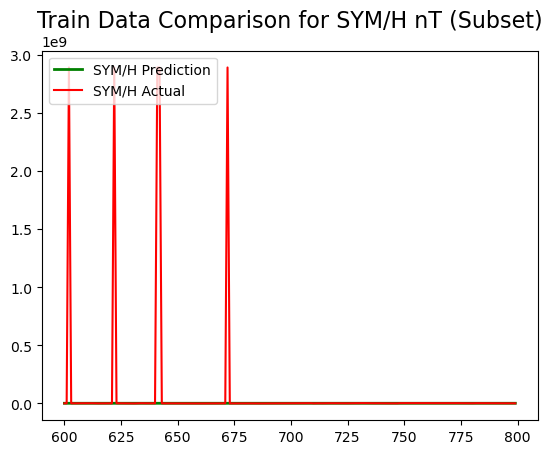

In [42]:
# Define the size of the subset you want to use
subset_size = 1000

# Convert the entire x_train to float32
x_train_float = x_train.astype(np.float32)

# Create a subset of the training data
x_train_subset = x_train_float[:subset_size]
y_train_subset = y_train[:subset_size]

# Generate predictions and plot for the subset
post_processed_df = plot_predictions_symh(lstm_model, x_train_subset, y_train_subset)
plt.title('Train Data Comparison for SYM/H nT (Subset)', fontsize=16)



32/32 [==============================] - 0s 4ms/step


Text(0.5, 1.0, 'Validation Data Comparison for SYM/H nT (Subset)')

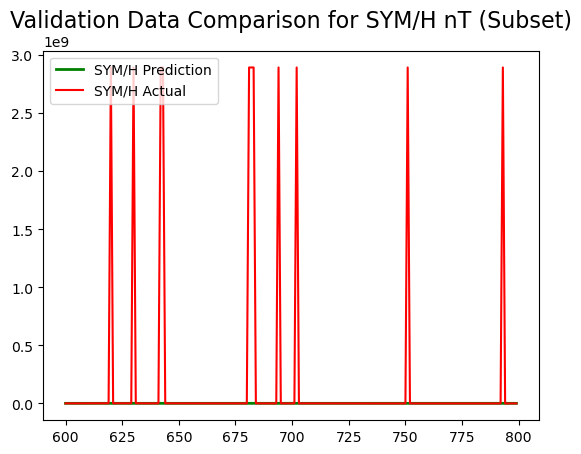

In [43]:

# Define the size of the subset you want to use for validation data
subset_size = 1000

# Convert the validation data to float32
x_val_float = x_val.astype(np.float32)

# Create a subset of the validation data
x_val_subset = x_val_float[:subset_size]
y_val_subset = y_val[:subset_size]

# Generate predictions and plot for the validation subset
post_processed_df = plot_predictions_symh(lstm_model, x_val_subset, y_val_subset)
plt.title('Validation Data Comparison for SYM/H nT (Subset)', fontsize=16)


In [44]:
x_test_float = x_test.astype('float32')


In [45]:
# Generate predictions for the subset
SYM_H_predict_subset = lstm_model.predict(x_test_subset)

# If your predictions are more than 1-dimensional, you may need to flatten or reshape them
SYM_H_predict_subset = SYM_H_predict_subset.flatten()

# Ensure that y_test_subset is also a 1D array
y_test_subset = y_test_subset.flatten()

# Now both arrays should have the same length
if len(SYM_H_predict_subset) == len(y_test_subset):
    # Create a scatter plot for predicted vs. actual values of the subset
    plt.scatter(SYM_H_predict_subset, y_test_subset, color='yellow')
    plt.xlabel('Predicted SYM/H nT')
    plt.ylabel('True SYM/H nT')
    plt.title('Prediction vs. True Values for Geomagnetic Storms (Subset)')
    plt.show()
else:
    print("The predictions and actual values have different lengths.")


32/32 [==============================] - 0s 4ms/step
The predictions and actual values have different lengths.


In [46]:
# # Define the size of the subset you want to use
# subset_size = 1000  # Adjust this value as needed based on your server's memory capacity

# # Make sure to convert x_test to float if it hasn't been done previously
# x_test_float = x_test.astype('float32')

# # Select a subset of the test data
# x_test_subset = x_test_float[:subset_size]
# y_test_subset = y_test[:subset_size]

# # Generate predictions for the subset
# SYM_H_predict_subset = lstm_model.predict(x_test_subset)

# # Create a scatter plot for predicted vs. actual values of the subset
# plt.scatter(SYM_H_predict_subset, y_test_subset, color='yellow')
# plt.xlabel('Predicted SYM/H nT')
# plt.ylabel('True SYM/H nT')

# # Set axis limits based on the subset data range
# plt.xlim([min(SYM_H_predict_subset.min(), y_test_subset.min()), max(SYM_H_predict_subset.max(), y_test_subset.max())])
# plt.ylim([min(SYM_H_predict_subset.min(), y_test_subset.min()), max(SYM_H_predict_subset.max(), y_test_subset.max())])

# # Add a reference line indicating perfect predictions
# plt.plot([min(SYM_H_predict_subset.min(), y_test_subset.min()), max(SYM_H_predict_subset.max(), y_test_subset.max())], 
#          [min(SYM_H_predict_subset.min(), y_test_subset.min()), max(SYM_H_predict_subset.max(), y_test_subset.max())], 
#          color='purple', linestyle='--')

# # Show the plot
# plt.title('Prediction vs. True Values for Geomagnetic Storms (Subset)')
# plt.show()


In [47]:
x_test_float = x_test.astype('float32')


In [51]:
print(x_test_float.shape)  # Should be (1000, timesteps, features) if you're predicting on 1000 samples


(54719, 3, 18)


In [50]:
# Determine the size of the subset you want to use
subset_size = 1000  # Adjust this number as needed

# Make sure to use the same preprocessing steps on x_test as you did for your training data
x_test_subset = x_test_float[:subset_size]

# Generate predictions for the subset of the test dataset
Y_predict_subset = lstm_model.predict(x_test_subset)

# Flatten the predictions and true labels if they are multi-dimensional
Y_predict_subset = Y_predict_subset.flatten()
y_test_subset = y_test[:subset_size].flatten()
 # Make sure this matches the preprocessing of y_train

# Calculate the error between predictions and true labels for the subset
error_subset = Y_predict_subset - y_test_subset

# Plot a histogram of the prediction errors for the subset
plt.hist(error_subset, bins=25)  # Fewer bins may be appropriate for smaller subsets
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Histogram of Prediction Errors for Geomagnetic Storms (Subset)")
plt.show()


32/32 [==============================] - 0s 4ms/step


ValueError: operands could not be broadcast together with shapes (60764000,) (1000,) 

In [52]:
# Use a subset of x_test for prediction
x_test_subset = x_test_float[:subset_size]
print(x_test_subset.shape)  # This should print (1000, timesteps, features) or whatever your subset_size is
Y_predict_subset = lstm_model.predict(x_test_subset)
print(Y_predict_subset.shape)  # This should print (1000, output_size)


(1000, 3, 18)
32/32 [==============================] - 0s 3ms/step
(1000, 60764)


In [53]:
error_subset = Y_predict_subset - y_test_subset


ValueError: operands could not be broadcast together with shapes (1000,60764) (1000,) 

In [54]:
# Predict using the corrected model
Y_predict_subset = lstm_model.predict(x_test_subset)

# Assuming the model outputs one value per sample, reshape if necessary
Y_predict_subset = Y_predict_subset.reshape((1000,))

# Calculate the error
error_subset = Y_predict_subset - y_test[:1000]


32/32 [==============================] - 0s 4ms/step


ValueError: cannot reshape array of size 60764000 into shape (1000,)

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,Y_predict)

NameError: name 'Y_predict' is not defined